
Modelo:  -0.2*x*y - 0.3*x + 0.55*y + 0.95 
Estimación temperatura:  1.225 K


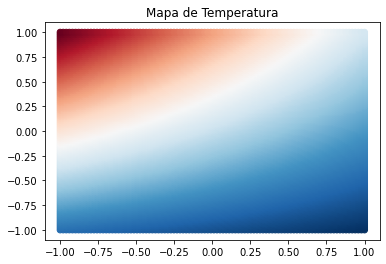

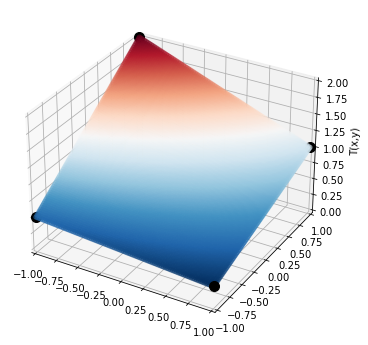

---------------------------------------- 
 Parte Minimización 
 ----------------------------------------


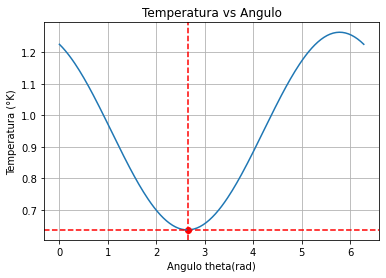

Temperatura mínima (en Kelvin):  0.6367664129532491 K
Ángulo mínimo (en radianes):  2.652198823131082


In [10]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

X=np.array([1,-1,1,-1])
Y=np.array([1,1,-1,-1])
Z=np.array([[1,2] , [0.3,0.5]]) 


def T(x,y,p):
    return p[0]+p[1]*x+p[2]*y+p[3]*x*y
p0=np.zeros((4,2))
p0[:,0]=X
p0[:,1]=Y


b=np.array([1,2,0.3,0.5])

def GetFit(p,b):
    M=np.ones((4,4))
    M[:,1]=p[:,0]
    M[:,2]=p[:,1]
    M[:,3]=p[:,0]*p[:,1]

    par=np.linalg.solve(M,b)
    return par
par= GetFit(p0,b)
r=T(0,0.5,par)

x=sym.Symbol("x",real="True")
y=sym.Symbol("y",real="True")

g=T(x,y,par)


print("\nModelo: ",g.simplify(),"\nEstimación temperatura: ",r,'K')


f=lambda x,y: T(x,y,par)

x=np.linspace(-1,1,100)
y=np.copy(x)
xx1,yy1=np.meshgrid(x,y)

plt.scatter(xx1,yy1, c = f(xx1,yy1), cmap= "RdBu_r")
plt.title('Mapa de Temperatura')
plt.show()

fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(111, projection = '3d')


ax1.set_xlim3d(-1, 1)
ax1.set_ylim3d(-1, 1)
ax1.set_zlim3d(0, 2)

ax1.set_zlabel("T(x,y)")
ax1.view_init(30, 300)


ax1.scatter(xx1,yy1,f(xx1,yy1), c = f(xx1,yy1), cmap= "RdBu_r",alpha=0.5)

ax1.scatter(1,1,f(1,1),color="k",s=100)
ax1.scatter(1,-1,f(1,-1),color="k",s=100)
ax1.scatter(-1,-1,f(-1,-1),color="k",s=100)
ax1.scatter(-1,1,f(-1,1),color="k",s=100)
ax1.grid()


plt.show()



"""
Minimización
"""
s="-"
print(s*40,"\n Parte Minimización \n",s*40)
def Rotate(p,theta):
        
    M=np.array([[np.cos(theta),-1*np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    n_p=np.dot(M,p)
    
    return n_p

N=200

theta=np.linspace(0,2*np.pi,int(N))


val_T=np.array([])
val_theta=np.copy(val_T)

for i in theta:
    p1 = np.zeros((4,2))
    p1[0,:] = Rotate(p0[0],i)
    p1[1,:] = Rotate(p0[1],i)
    p1[2,:] = Rotate(p0[2],i)
    p1[3,:] = Rotate(p0[3],i)
    para= GetFit(p1,b)
    
    r=T(0,0.5,para)
    val_T=np.append(val_T,r)
    val_theta=np.append(val_theta,i)

T_min=np.min(val_T)

n=np.where(val_T == T_min)

theta_min=val_theta[n]

plt.plot(theta,val_T)
plt.scatter(theta_min,T_min,color="r")
plt.title("Temperatura vs Angulo")
plt.xlabel("Angulo theta(rad)")
plt.ylabel("Temperatura (°K)")
plt.axhline(y=T_min,color="r",linestyle= "dashed")
plt.axvline(x=theta_min,color="r",linestyle= "dashed")
plt.grid()
plt.show()
print("Temperatura mínima (en Kelvin): ",T_min,'K')
print("Ángulo mínimo (en radianes): ",float(theta_min))